In [1]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import re

import config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_electricity_load(true_values: any, predicted_values: any) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_electricity_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_electricity_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_electricity_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_electricity_load_list_by_mean_std_with_cla_labels(true_values: any, predicted_values_list: any, labels: List[str], sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    plt.plot(time_points, true_values, color='black', label='True Values', linestyle='--')
    for label in labels:
        color = config.label_color_map.get(label, 'k') # Use the CLA label to get the color
        index = labels.index(label
                             )
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_electricity_load_list_by_mean_std_with_cla_labels_and_zoom(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    plt.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        color = config.label_color_map.get(label, 'k')  # Use the CLA label to get the color
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)


    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)

    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    # ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    ax_zoom = inset_axes(ax, width="40%", height="40%", loc='lower right')
    
    ax_zoom.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        color = config.label_color_map.get(label, 'k')  # Use the CLA label to get the color
        index = labels.index(label)
        ax_zoom.plot(time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    # ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    # mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

    plt.show()

In [9]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error [MW]')
    # plt.title('Electricity Consumption Prediction')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [10]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Prediction error [MW]')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [11]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error [MW]')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [12]:
def plot_total_prediction_absolute_error_per_period(error_abs_value: any, period: int) -> None:
    pass

In [13]:
def plot_total_prediction_absolute_error_per_period_by_mean_std(error_abs_value: any, sampling_interval: int, period: int) -> None:
    pass

In [14]:
def plot_cell_synapases_history_by_mean_std(cell_synapases_history_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # start from zero
    time_points = range(config.cell_synapases_start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = cell_synapases_history_values.mean(axis=1)
    std_values = cell_synapases_history_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Cell Synapases')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Cell Synapases History')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [15]:
def plot_cell_synapases_history(cell_synapases_history_values: any) -> None:
    plt.figure(figsize=(10, 6))

    for i in range(config.nTrial):
        plt.plot(cell_synapases_history_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Cell Synapases History')
    plt.title('Cell Synapases History')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [16]:
def calculate_total_absolute_error(error_abs_value: any) -> float:
    total_absolute_errors = error_abs_value.sum(axis=0)
    tae = total_absolute_errors.mean()
    return tae

def plot_tae_list(tae_list: list[float]) -> None:
    num_cases = len(tae_list)
    x_labels = [f"Case {i+1}" for i in range(num_cases)]
    x = range(1, len(tae_list)+1)
    
    plt.plot(x, tae_list, marker='o', markersize=6, linestyle='-', label='TAE')
    plt.xlabel('Cases')
    plt.ylabel('TAE')
    plt.xticks(x, x_labels)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    min_y_value = min(tae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    plt.show()

In [17]:
def calculate_mean_absolute_error(error_abs_value: any) -> float:
    mean_by_column = error_abs_value.mean(axis=0)
    total_mean_by_column = mean_by_column.sum()
    mae = total_mean_by_column / config.nTrial
    return mae

def plot_mae_list(mae_list: list[float]) -> None:
    num_cases = len(mae_list)
    x_labels = [f"Case {i+1}" for i in range(num_cases)]
    x = range(1, len(mae_list)+1)
    
    plt.plot(x, mae_list, marker='o', markersize=6, linestyle='-', label='MAE')
    plt.xlabel('Cases')
    plt.ylabel('MAE')
    plt.xticks(x, x_labels)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    min_y_value = min(mae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    plt.show()

In [18]:
def plot_evaluation_metric(mae_list: list[float], tae_list: list[float]) -> None:
    num_cases = len(mae_list)
    x_labels = [f"Case {i+1}" for i in range(num_cases)]
    x = range(1, len(mae_list)+1)
    
    plt.plot(x, tae_list, marker='o', markersize=6, linestyle='-', label='TAE')
    plt.plot(x, mae_list, marker='o', markersize=6, linestyle='-', label='MAE')

    plt.xlabel('Cases')
    plt.ylabel('Prediction error [MW]')
    plt.xticks(x, x_labels)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    min_y_value = min(tae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    min_y_value = min(mae_list)
    plt.axhline(y=min_y_value, color='red', linestyle='--')
    plt.show()

## Init

In [19]:
print(config.ROOT_PATH)

/home/zhangqiang/work/repos/time-series/utils


## Case 1

### Read prediction results file

In [20]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [21]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
829826,414911,NaN,NaN,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,NaN
829827,414912,NaN,NaN,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,NaN
829828,414913,NaN,NaN,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,NaN
829829,414914,NaN,NaN,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,NaN
829830,414915,NaN,NaN,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,130.9370,NaN


In [22]:
case1_df.iloc[414911:414920]

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
414911,414912,5926.45,NaN,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,5932.7000,NaN
414912,414913,5833.45,NaN,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,5843.1800,NaN
414913,414914,5740.00,NaN,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,5760.3200,NaN
414914,414915,5646.60,NaN,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,5671.9900,NaN
414915,414916,5541.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414916,1,NaN,NaN,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,NaN
414917,2,NaN,NaN,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,NaN
414918,3,NaN,NaN,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,NaN
414919,4,NaN,NaN,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,NaN


In [23]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [24]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02,5610.02
414820,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51,5483.51
414821,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15,5379.15
414822,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09,5292.09
414823,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61,5219.61
...,...,...,...,...,...,...,...,...,...,...
414910,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91,5997.91
414911,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70,5932.70
414912,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18,5843.18
414913,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32,5760.32


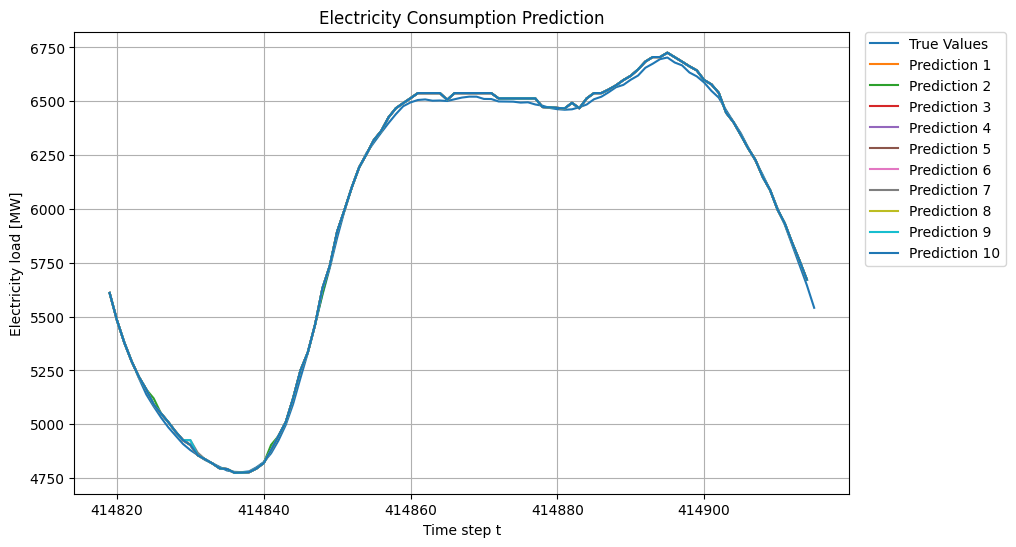

In [25]:
plot_electricity_load(true_values, case1_predicted_values)

In [26]:
# plot_electricity_load_by_mean_max_min(true_values, case1_predicted_values, 10)

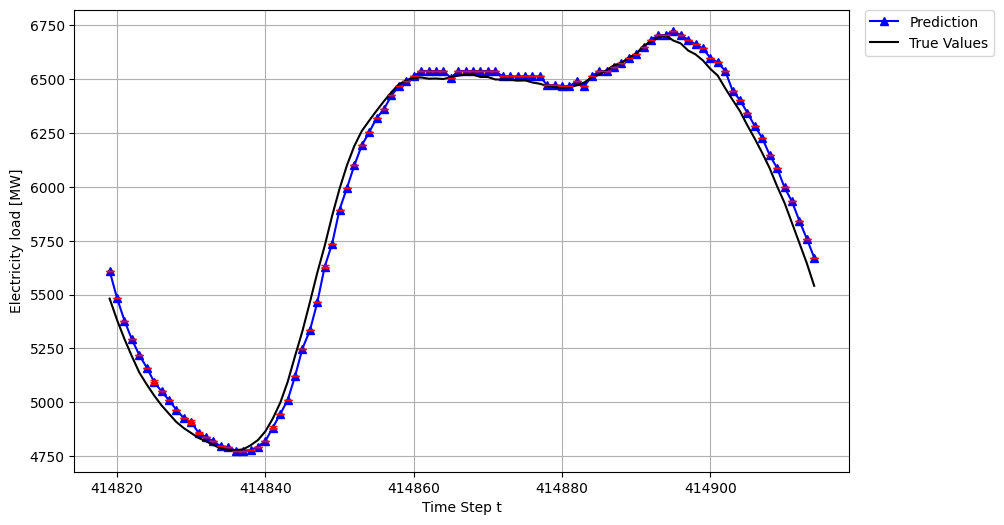

In [27]:
plot_electricity_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [28]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900,128.2900
829736,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320,101.1320
829737,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793,85.2793
829738,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694,78.3694
829739,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632,81.0632
...,...,...,...,...,...,...,...,...,...,...
829826,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631,71.4631
829827,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539,99.2539
829828,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790,103.1790
829829,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220,113.7220


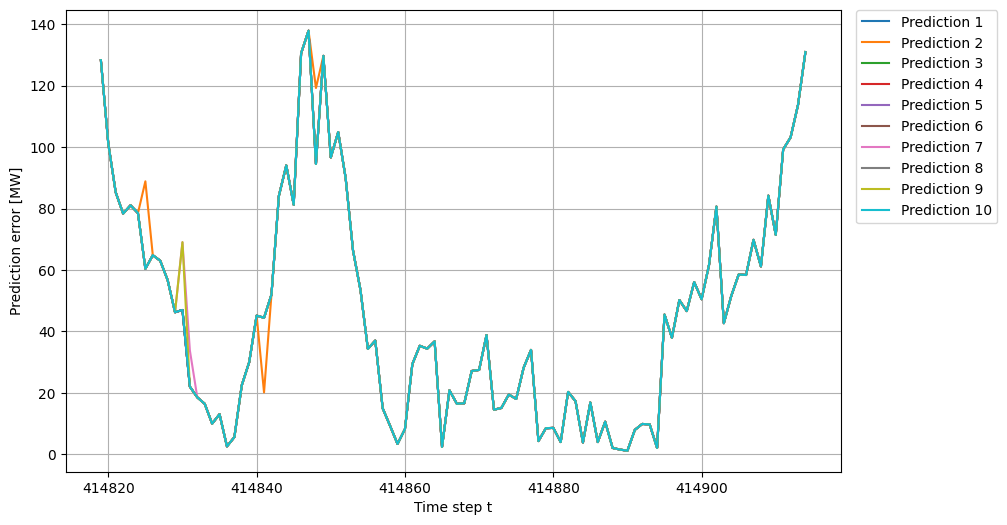

In [29]:
plot_prediction_absolute_error(case1_error_abs_value)

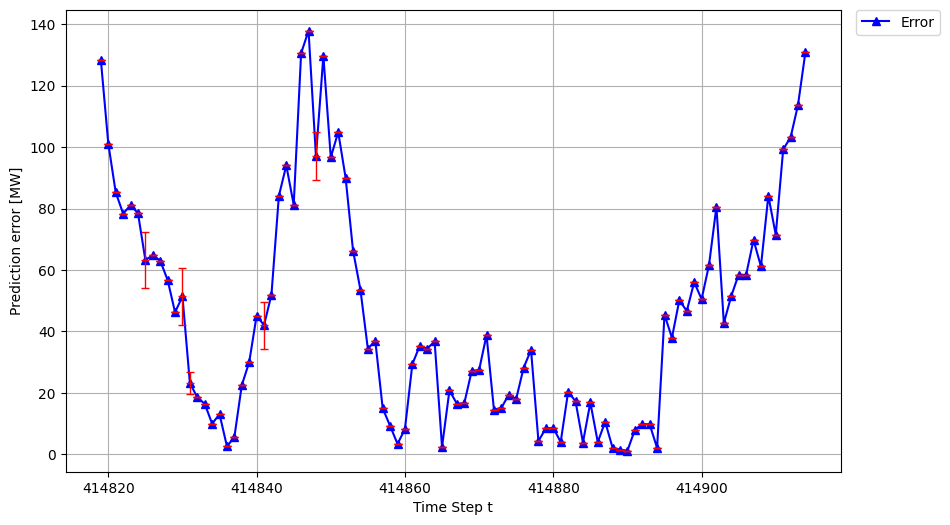

In [30]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

## Case 2

In [31]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [32]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [33]:
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5648.93,5648.93,5600.69,5648.93,5648.93,5648.93,5648.93,5648.93,5648.93,5648.93
414820,5496.98,5496.98,5496.98,5496.98,5496.98,5496.98,5496.98,5496.98,5496.98,5496.98
414821,5402.82,5402.82,5402.82,5402.82,5402.82,5402.82,5402.82,5402.82,5402.82,5402.82
414822,5296.39,5296.39,5296.39,5296.39,5296.39,5296.39,5296.39,5296.39,5296.39,5296.39
414823,5197.68,5197.68,5197.68,5197.68,5197.68,5197.68,5197.68,5197.68,5197.68,5197.68
...,...,...,...,...,...,...,...,...,...,...
414910,5999.36,5999.36,5999.36,5999.36,5999.36,5999.36,5999.36,5999.36,5999.36,5999.36
414911,5945.57,5945.57,5945.57,5945.57,5945.57,5945.57,5945.57,5945.57,5945.57,5945.57
414912,5843.64,5843.64,5843.64,5843.64,5843.64,5843.64,5843.64,5843.64,5843.64,5843.64
414913,5739.78,5803.68,5803.68,5803.68,5803.68,5803.68,5803.68,5803.68,5803.68,5803.68


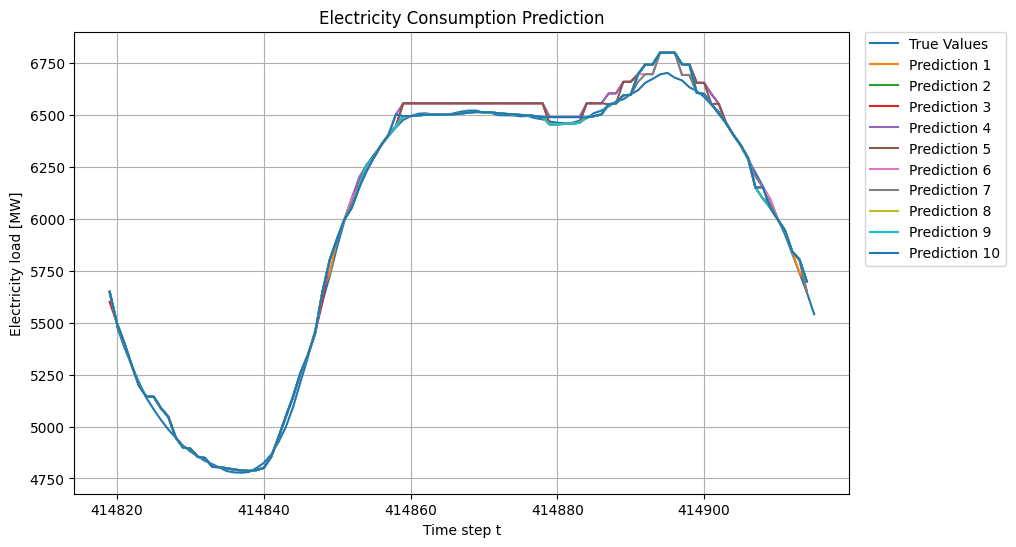

In [34]:
plot_electricity_load(true_values, case2_predicted_values)

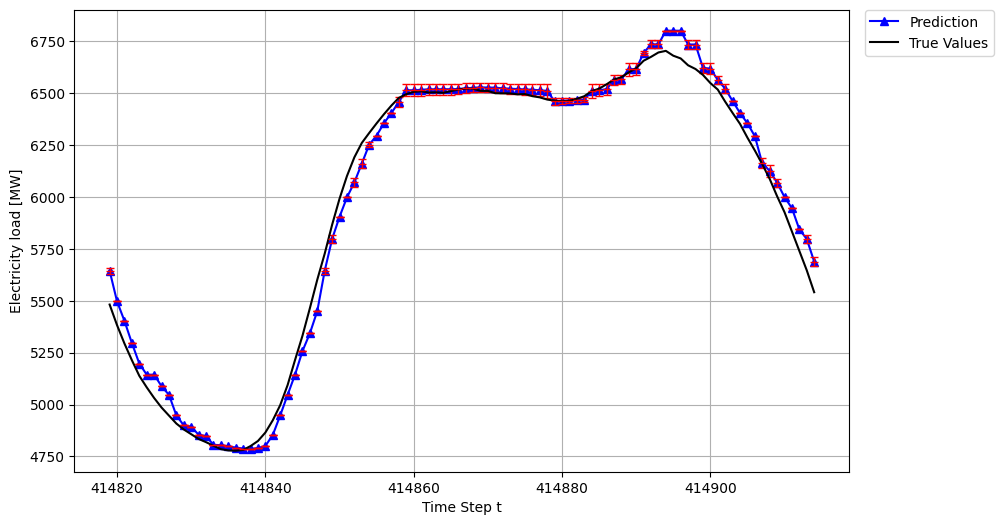

In [35]:
plot_electricity_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [36]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,167.2010,167.2010,118.9620,167.2010,167.2010,167.2010,167.2010,167.2010,167.2010,167.2010
829736,114.6060,114.6060,114.6060,114.6060,114.6060,114.6060,114.6060,114.6060,114.6060,114.6060
829737,108.9460,108.9460,108.9460,108.9460,108.9460,108.9460,108.9460,108.9460,108.9460,108.9460
829738,82.6618,82.6618,82.6618,82.6618,82.6618,82.6618,82.6618,82.6618,82.6618,82.6618
829739,59.1326,59.1326,59.1326,59.1326,59.1326,59.1326,59.1326,59.1326,59.1326,59.1326
...,...,...,...,...,...,...,...,...,...,...
829826,72.9062,72.9062,72.9062,72.9062,72.9062,72.9062,72.9062,72.9062,72.9062,72.9062
829827,112.1160,112.1160,112.1160,112.1160,112.1160,112.1160,112.1160,112.1160,112.1160,112.1160
829828,103.6380,103.6380,103.6380,103.6380,103.6380,103.6380,103.6380,103.6380,103.6380,103.6380
829829,93.1827,157.0790,157.0790,157.0790,157.0790,157.0790,157.0790,157.0790,157.0790,157.0790


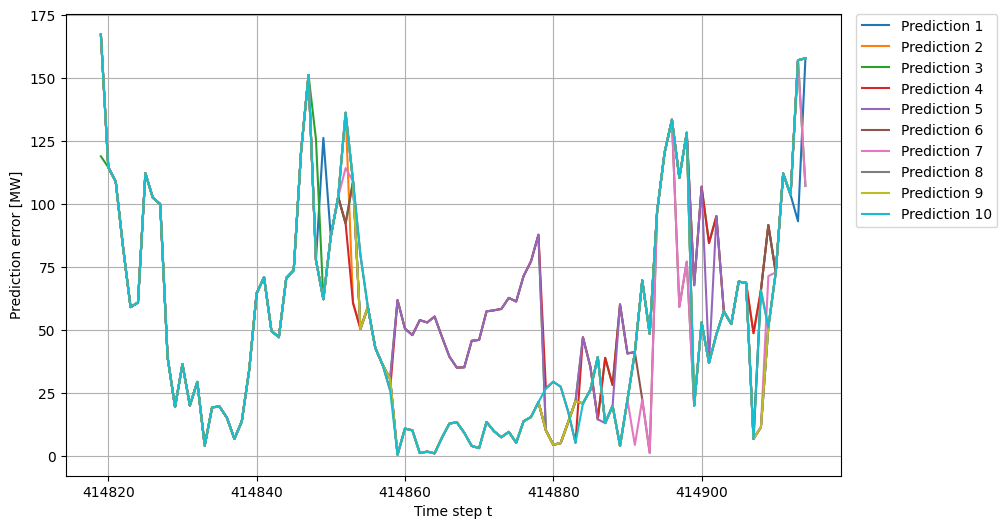

In [37]:
plot_prediction_absolute_error(case2_error_abs_value)

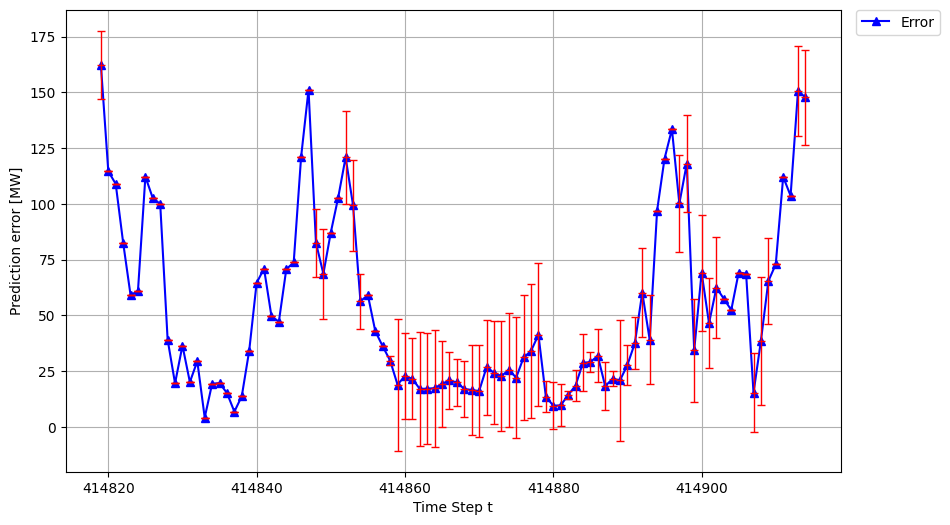

In [38]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

## Case 3

In [39]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [40]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [41]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5501.40,5470.79,5488.76,5488.76,5488.76,5607.55,5512.50,5580.17,5470.79,5607.55
414820,5359.74,5380.76,5402.43,5371.30,5371.30,5450.06,5371.30,5349.47,5349.47,5450.06
414821,5258.38,5290.35,5310.09,5258.38,5258.38,5249.89,5258.38,5268.96,5279.70,5268.96
414822,5199.24,5180.73,5258.38,5187.83,5199.24,5180.73,5180.73,5180.73,5210.95,5210.95
414823,5138.96,5110.44,5144.16,5121.44,5110.44,5128.55,5115.94,5229.23,5110.44,5138.96
...,...,...,...,...,...,...,...,...,...,...
414910,6008.12,5929.66,5929.66,5994.98,6008.12,5918.97,5929.66,5918.97,5918.97,6008.12
414911,5928.70,5848.58,5848.58,5844.71,5928.70,5830.05,5830.05,5848.58,5830.05,5928.70
414912,5831.07,5760.37,5738.53,5750.26,5840.83,5729.78,5729.78,5804.39,5750.26,5831.07
414913,5738.97,5638.50,5649.28,5649.28,5738.97,5629.29,5638.50,5701.54,5638.50,5738.97


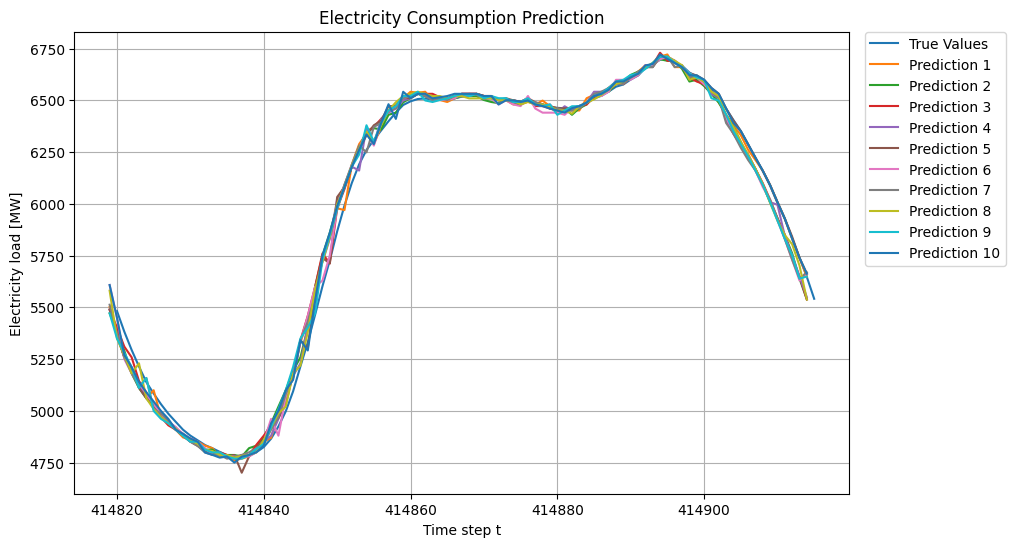

In [42]:
plot_electricity_load(true_values, case3_predicted_values)

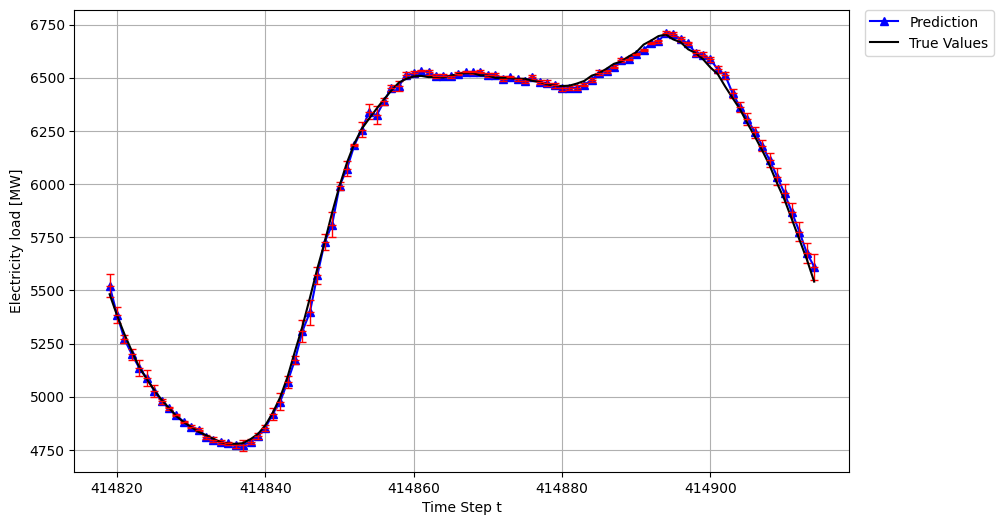

In [43]:
plot_electricity_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [44]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,19.678600,10.93270,7.03310,7.03310,7.0331,125.82900,30.77260,98.44640,10.93270,125.829000
829736,22.630600,1.61107,20.05490,11.07340,11.0734,67.68260,11.07340,32.90400,32.90400,67.682600
829737,35.497000,3.52626,16.21760,35.49700,35.4970,43.98380,35.49700,24.91090,14.17030,24.910900
829738,14.483000,32.99840,44.65300,25.89860,14.4830,32.99840,32.99840,32.99840,2.77289,2.772890
829739,0.412653,28.10660,5.61032,17.11370,28.1066,9.99824,22.61010,90.67960,28.10660,0.412653
...,...,...,...,...,...,...,...,...,...,...
829826,81.674900,3.21266,3.21266,68.53220,81.6749,7.48135,3.21266,7.48135,7.48135,81.674900
829827,95.248900,15.13080,15.13080,11.25690,95.2489,3.39706,3.39706,15.13080,3.39706,95.248900
829828,91.072100,20.36770,1.46828,10.26000,100.8330,10.22010,10.22010,64.39230,10.26000,91.072100
829829,92.372200,8.09674,2.68075,2.68075,92.3722,17.31000,8.09674,54.93680,8.09674,92.372200


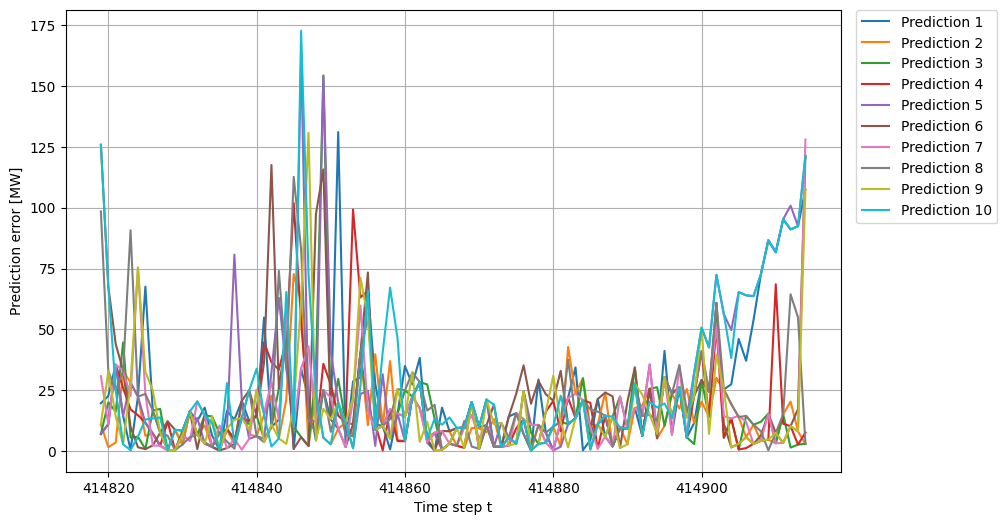

In [45]:
plot_prediction_absolute_error(case3_error_abs_value)

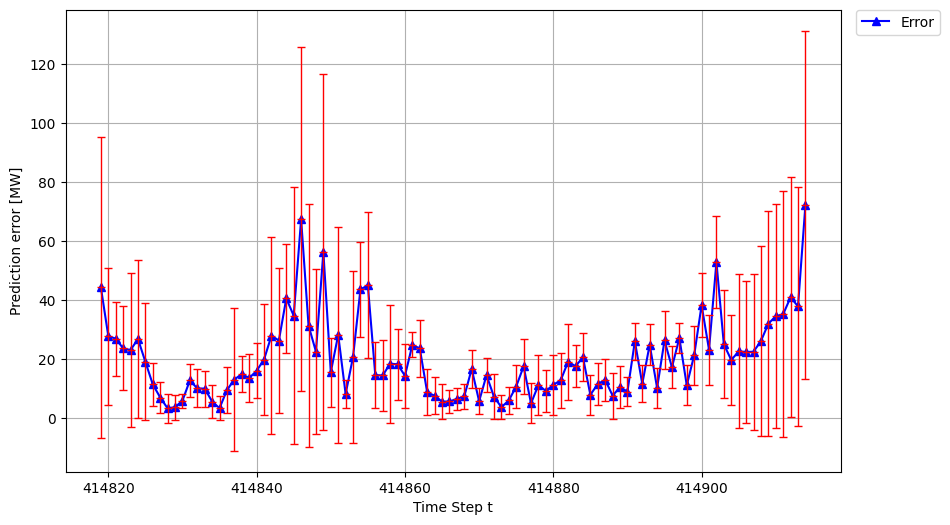

In [46]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

## Case 4: Proposed

In [47]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [48]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [49]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5480.53,5480.53,5506.95,5607.55,5488.76,5480.53,5488.76,5458.31,5599.40,5501.40
414820,5359.74,5359.74,5389.88,5439.46,5359.74,5359.74,5371.30,5349.47,5359.74,5359.74
414821,5258.38,5274.33,5290.35,5279.70,5268.96,5268.96,5268.96,5389.88,5249.89,5268.96
414822,5169.32,5210.95,5199.24,5187.83,5180.73,5193.53,5187.83,5199.24,5169.32,5187.83
414823,5211.78,5138.96,5138.96,5121.44,5110.44,5133.76,5128.55,5218.45,5110.44,5124.99
...,...,...,...,...,...,...,...,...,...,...
414910,5929.66,6008.12,6008.12,6008.12,5918.97,6000.53,5918.97,6008.12,6000.53,6008.12
414911,5830.05,5928.70,5928.70,5928.70,5848.58,5928.70,5840.83,5928.70,5928.70,5918.97
414912,5750.26,5840.83,5840.83,5840.83,5791.15,5840.83,5760.37,5831.07,5840.83,5840.83
414913,5638.50,5738.97,5738.97,5738.97,5701.54,5738.97,5662.25,5738.97,5738.97,5738.97


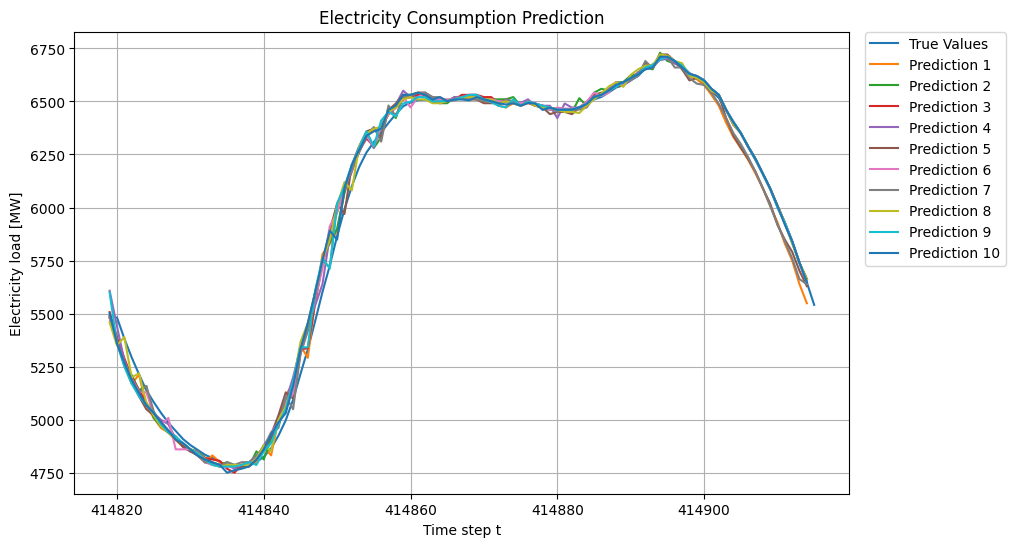

In [50]:
plot_electricity_load(true_values, case4_predicted_values)

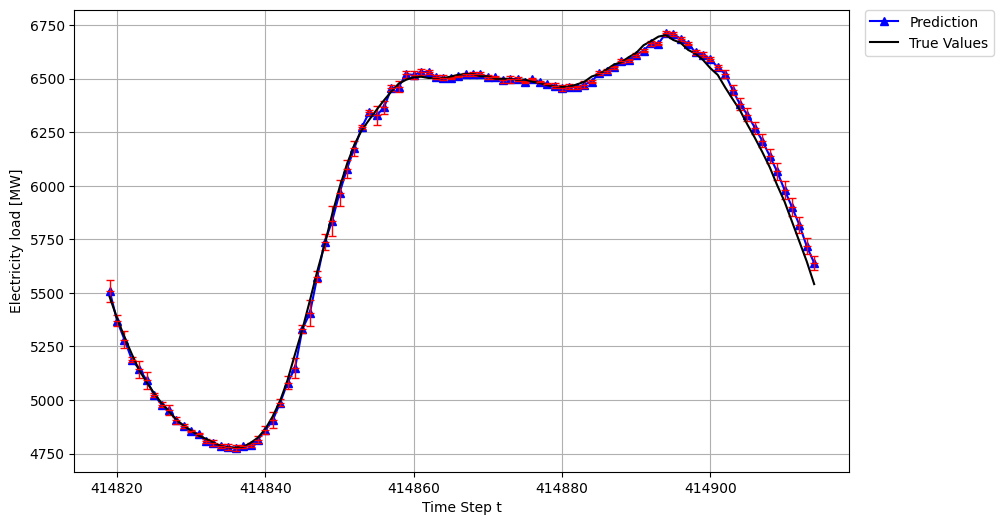

In [51]:
plot_electricity_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [52]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
829735,1.19073,1.190730,25.225600,125.8290,7.03310,1.19073,7.03310,23.4125,117.6790,19.6786
829736,22.63060,22.630600,7.502170,57.0885,22.63060,22.63060,11.07340,32.9040,22.6306,22.6306
829737,35.49700,19.540600,3.526260,14.1703,24.91090,24.91090,24.91090,96.0022,43.9838,24.9109
829738,44.40820,2.772890,14.483000,25.8986,32.99840,20.19080,25.89860,14.4830,44.4082,25.8986
829739,73.23400,0.412653,0.412653,17.1137,28.10660,4.79279,9.99824,79.8966,28.1066,13.5560
...,...,...,...,...,...,...,...,...,...,...
829826,3.21266,81.674900,81.674900,81.6749,7.48135,74.08310,7.48135,81.6749,74.0831,81.6749
829827,3.39706,95.248900,95.248900,95.2489,15.13080,95.24890,7.38306,95.2489,95.2489,85.5187
829828,10.26000,100.833000,100.833000,100.8330,51.15210,100.83300,20.36770,91.0721,100.8330,100.8330
829829,8.09674,92.372200,92.372200,92.3722,54.93680,92.37220,15.65420,92.3722,92.3722,92.3722


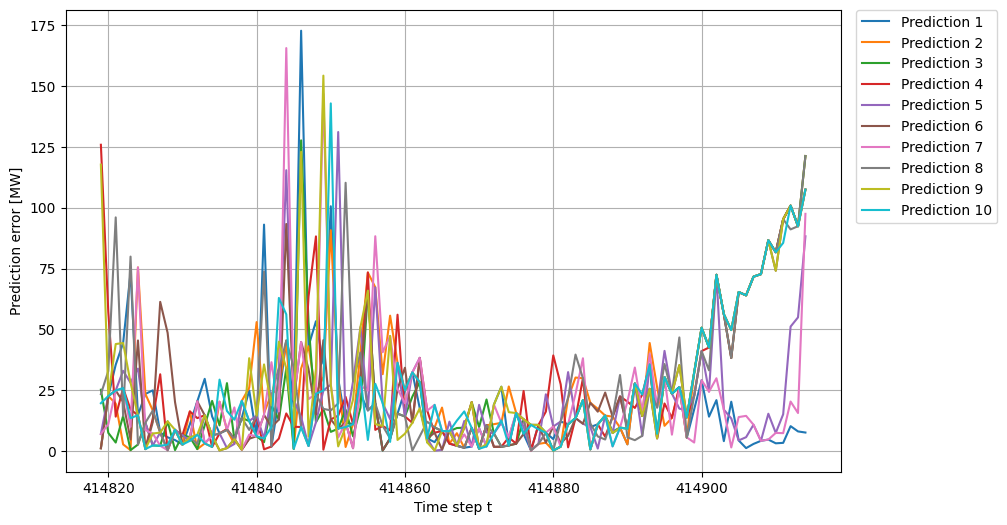

In [53]:
plot_prediction_absolute_error(case4_error_abs_value)

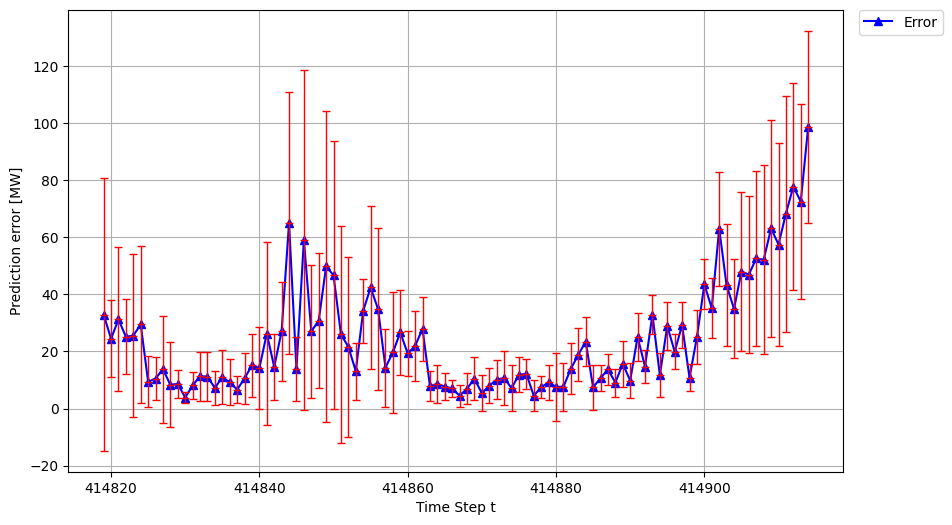

In [54]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

## Summary

In [55]:
predicted_values_list = []
error_abs_value_list = []

# The following are the case labels you want to pass
# case_labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
# case_labels = ['Case 1', 'Case 4']
# cla_labels = ['CLA(Fit)', 'CLA(Wide)', 'CLA(Narrow)', 'CLA-DR']
cla_labels = ['CLA(Fit)', 'CLA-DR']

# The following are the case labels you want to pass
predicted_values_list.append(case1_predicted_values)
# predicted_values_list.append(case2_predicted_values)
# predicted_values_list.append(case3_predicted_values)
predicted_values_list.append(case4_predicted_values)

error_abs_value_list.append(case1_error_abs_value)
# error_abs_value_list.append(case2_error_abs_value)
# error_abs_value_list.append(case3_error_abs_value)
error_abs_value_list.append(case4_error_abs_value)

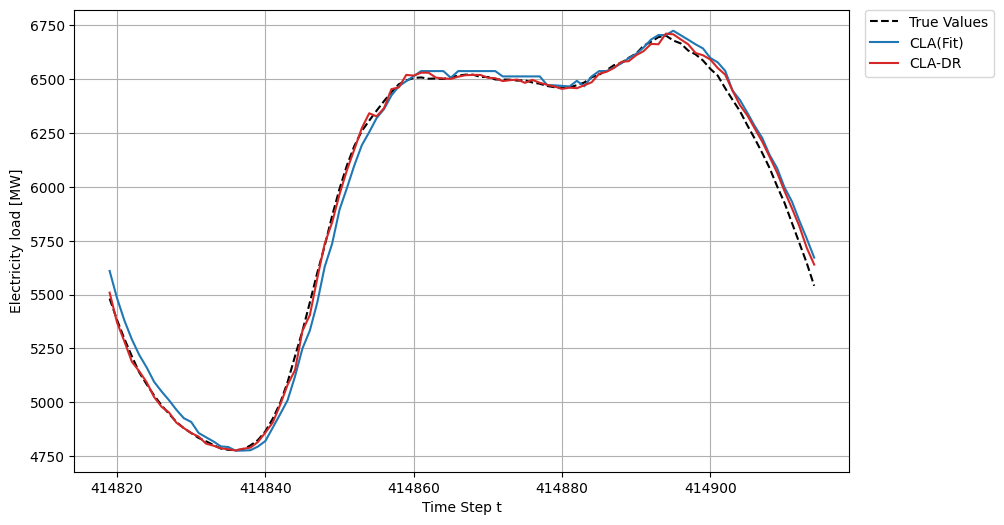

In [56]:
# plot_electricity_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)
plot_electricity_load_list_by_mean_std_with_cla_labels(true_values, predicted_values_list, labels=cla_labels, sampling_interval=config.sampling_interval)

In [57]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)
# plot_electricity_load_list_by_mean_std_with_cla_labels_and_zoom(true_values, predicted_values_list, labels=cla_labels, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords_max)

In [58]:
# plot_electricity_load_list_by_mean_std_with_cla_labels_and_zoom(true_values, predicted_values_list, labels=cla_labels, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords_min)